In [1]:
pip install easyocr

  Using cached easyocr-1.7.1-py3-none-any.whl (2.9 MB)
  Using cached torchvision-0.16.2-cp38-cp38-win_amd64.whl (1.1 MB)
  Using cached pyclipper-1.3.0.post5-cp38-cp38-win_amd64.whl (108 kB)
  Using cached PyYAML-6.0.1-cp38-cp38-win_amd64.whl (157 kB)
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\asus\Python Data Science\Image Processing\Image_Processing\Scripts\python.exe -m pip install --upgrade pip' command.


In [1]:
import cv2
import easyocr
from matplotlib import pyplot as plt

In [2]:
def preprocess_image(image_path):
    # Load the image
    img = cv2.imread(image_path)

    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise and improve OCR accuracy
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    return blurred


In [3]:
def perform_ocr(image, reader):
    # Perform OCR on the preprocessed image
    result = reader.readtext(image)

    # Extract and return the recognized text
    recognized_text = ' '.join([entry[1] for entry in result])
    return recognized_text


In [4]:
def display_image_with_results(image, recognized_text):
    # Display the image with recognized text
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(f"Recognized Text: {recognized_text}")
    plt.axis('off')
    plt.show()

In [5]:
def number_plate_recognition(image_path):
    # Preprocess the image
    preprocessed_image = preprocess_image(image_path)

    # Create an OCR reader using the 'en' language for English text
    reader = easyocr.Reader(['en'])

    # Perform OCR on the preprocessed image
    recognized_text = perform_ocr(preprocessed_image, reader)

    # Display the results
    display_image_with_results(cv2.imread(image_path), recognized_text)

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


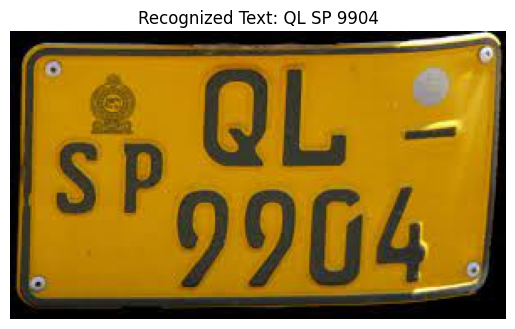

In [9]:
# Example usage
image_path = 'plate.jpg'
number_plate_recognition(image_path)